<a href="https://colab.research.google.com/github/LanqingDu/UnstructuredDataAnalytics/blob/main/08_Ngrams.ipynb" target="_blank">
<img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# **N-grams Part II**



> **Instructor:** Dr. Lanqing Du  
> **Acknowledgement:** This notebook referenced to R user guide content and Machine Learning resoures.  
> **Objective:** Introduction to ngrams (part 2) using R.  
> **Instructions:** You can preview the **Table of Contents** from the side bar.

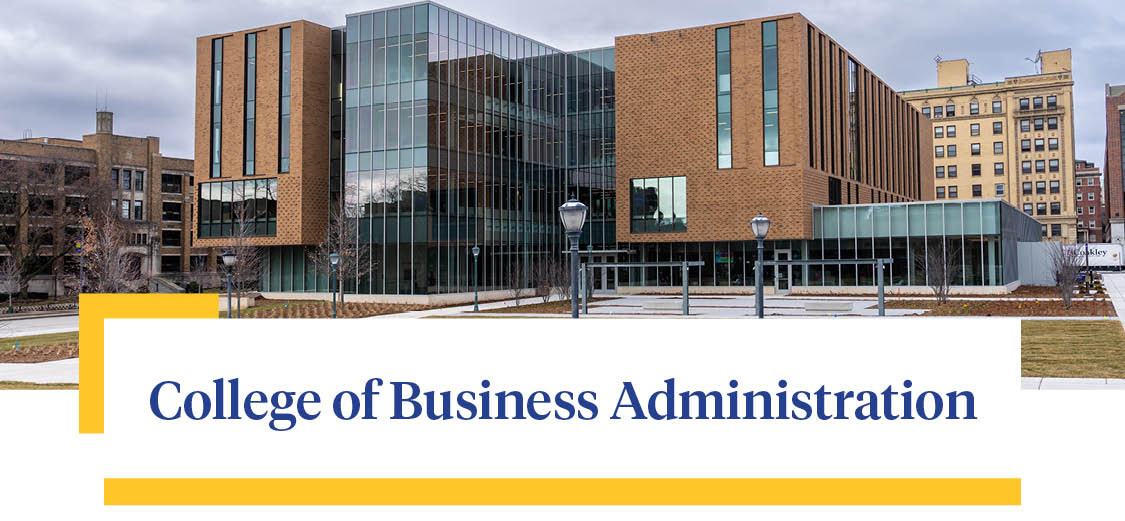
---

## [1. Objective](#obj)

This tutorial utilizes the dataset available through the Jane Austen data.

We begin our introduction to frequency counts starting from the *count()* function. The following tasks will guide our workflow:

1. **Library Setup**
Install and load all required packages for data access, text processing, and visualization.

2. **Data Exploration**
Import the dataset and review its structure, variables, and any predefined helper functions.

3. **Text Preprocessing**
Clean and transform the text into a structured format (e.g., data frame or tibble) for analysis — also known as text tidying.

4. **Word Frequency Analysis**
Use count() to identify and visualize the most frequent words in the corpus.

5. **N-gram Analysis**
Generate and analyze N-grams (bigrams, trigrams, etc.) to capture multi-word expressions and contextual relationships.

6. **Sentiment with Negation via Bigrams**
Make sentiment analysis more accurate by properly handling negation words (like not, never, no, isn’t, etc.) that can invert or alter the sentiment of the words that follow.

7. **Co-occurence and Correlation**






## [2. Jane Austen Data](#ML)




In this section, we will replicate the previous procedures using the Jane Austen dataset to compare the outcomes obtained from unigram and n-gram analyses.

### 2.1 Bigram

In [ ]:
# ============================================================
# Step 1: Libraries
# ============================================================
install.packages('tidytext')
install.packages('tidyverse')

library(tidytext)
library(tidyverse)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘SnowballC’, ‘janeaustenr’, ‘tokenizers’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.1     ✔ stringr   1.5.2
✔ ggplot2   4.0.0     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.1.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [ ]:
# ============================================================
# Step 2: Bigram tokenization
# ============================================================

install.packages("janeaustenr")
library(janeaustenr)

austen_bigrams <- austen_books() %>%
                unnest_tokens(bigram, text, token = "ngrams", n = 2)
                austen_bigrams

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



book,bigram
<fct>,<chr>
Sense & Sensibility,sense and
Sense & Sensibility,and sensibility
Sense & Sensibility,NA
Sense & Sensibility,by jane
Sense & Sensibility,jane austen
Sense & Sensibility,NA
Sense & Sensibility,NA
Sense & Sensibility,NA
Sense & Sensibility,NA


In [ ]:
# ============================================================
# Step 3: Counting and Filtering Bigrams
# ============================================================

library(tidyr)
bigrams_separated <- austen_bigrams %>%
                      separate(bigram, c("word1", "word2"), sep = " ")
                      bigrams_filtered <- bigrams_separated %>%
                      filter(!word1 %in% stop_words$word) %>%
                      filter(!word2 %in% stop_words$word)
                      bigram_counts <- bigrams_filtered %>%
                      count(word1, word2, sort = TRUE)


In [ ]:
# ============================================================
# Step 4: TF-IDF of Bigrams Across Books
# ============================================================

bigrams_united <- bigrams_filtered %>%
                    unite(bigram, word1, word2, sep = " ")

bigram_tf_idf <- bigrams_united %>%
                  count(book, bigram) %>%
                  bind_tf_idf(bigram, book, n) %>%
                  arrange(desc(tf_idf))

### 2.2 Sentiment with Negation via Bigrams

In [ ]:
# ============================================================
# Step 5: Negations
# ============================================================


BING <- get_sentiments("bing")

not_words <- bigrams_separated %>%
              filter(word1 == "not") %>%
              inner_join(BING, by = c(word2 = "word")) %>%
              mutate(score = if_else(sentiment == "positive", 1L, -1L)) %>%
              count(word2, score, sort = TRUE) %>%
              ungroup()

[1] 295   3

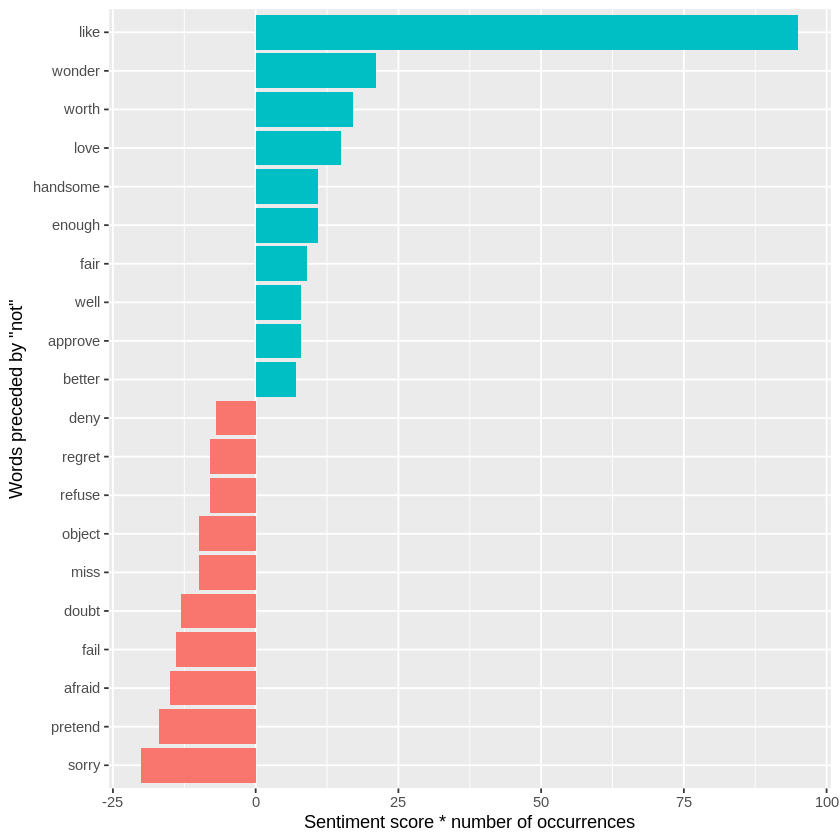

In [ ]:
# ============================================================
# Step 6: Negations visualization
# ============================================================

not_words %>%
          mutate(contribution = n * score) %>%
          arrange(desc(abs(contribution))) %>%
          head(20) %>%
          mutate(word2 = reorder(word2, contribution)) %>%
          ggplot(aes(word2, n * score, fill = n * score > 0)) +
          geom_col(show.legend = FALSE) +
          xlab('Words preceded by "not"') +
          ylab('Sentiment score * number of occurrences') +
          coord_flip()

dim(not_words)

[1] 659   4

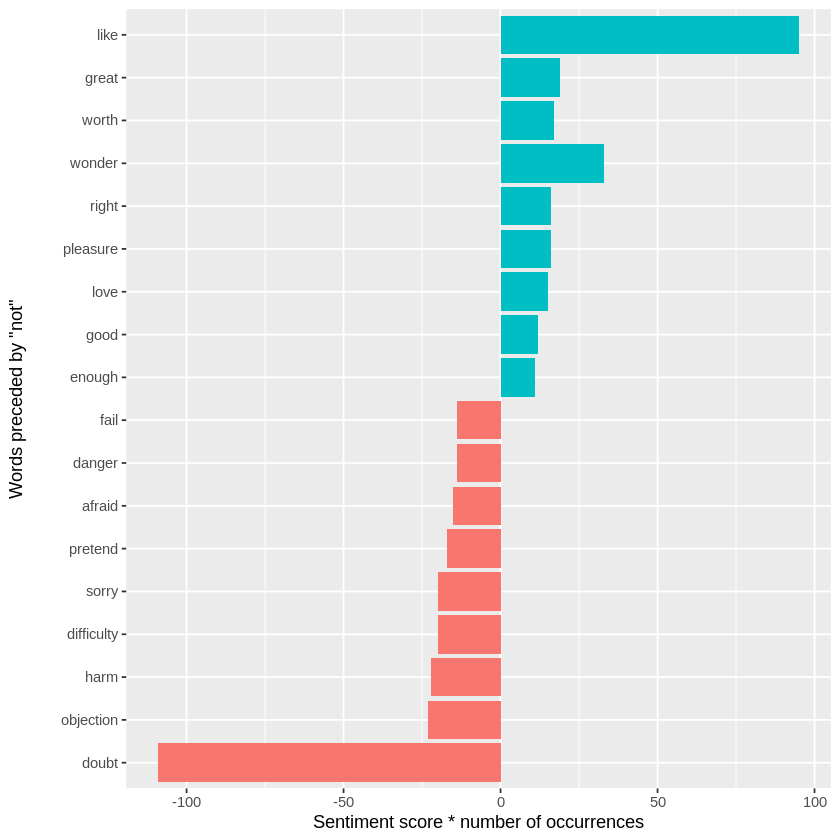

In [ ]:
# ============================================================
# Step 7: Customize Negator Set
# ============================================================


negation_words <- c("not","no","never","without")

negated_words <- bigrams_separated %>%
                  filter(word1 %in% negation_words) %>%
                  inner_join(BING, by = c(word2 = "word")) %>%
                  mutate(score = if_else(sentiment == "positive", 1L, -1L)) %>%
                  count(word1, word2, score, sort = TRUE) %>%
                  ungroup()

dim(negated_words)

negated_words %>%
          mutate(contribution = n * score) %>%
          arrange(desc(abs(contribution))) %>%
          head(20) %>%
          mutate(word2 = reorder(word2, contribution)) %>%
          ggplot(aes(word2, n * score, fill = n * score > 0)) +
          geom_col(show.legend = FALSE) +
          xlab('Words preceded by "not"') +
          ylab('Sentiment score * number of occurrences') +
          coord_flip()

### 2.4 Bigram Graph

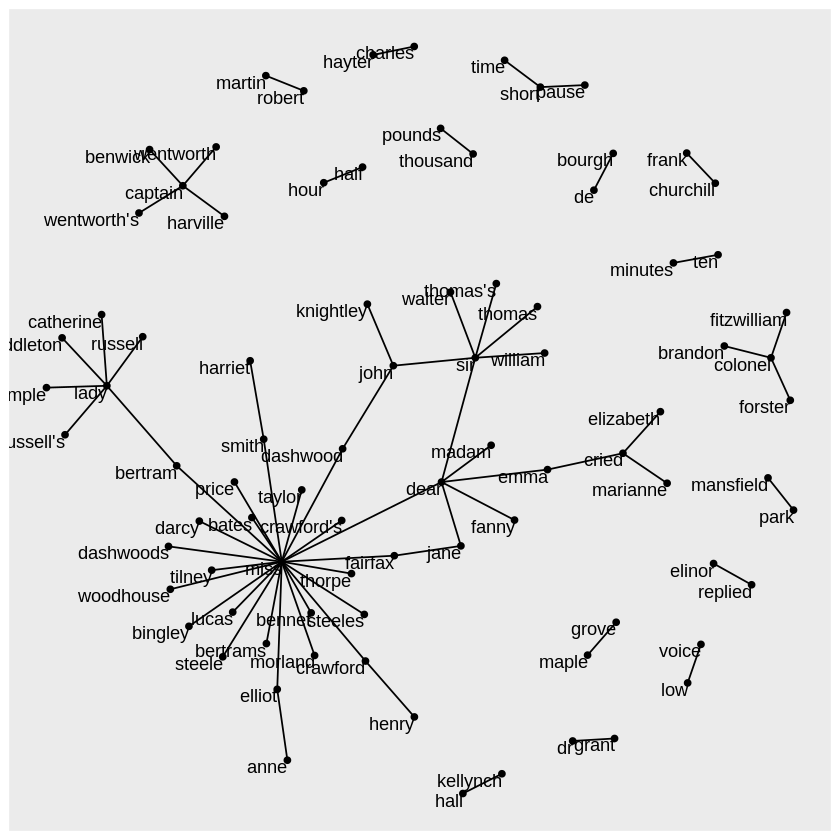

In [ ]:
# ============================================================
# Step 8: Bigram Graph
# ============================================================

# install.packages('igraph')
# install.packages('ggraph')

library(igraph); library(ggraph)

bigram_graph <- bigram_counts %>%
                filter(n > 20) %>%
                filter(!is.na(word1) & !is.na(word2)) %>% # Filter out NA values
                graph_from_data_frame() # Create directed graph

set.seed(2025)

ggraph(bigram_graph, layout = "fr") +
        geom_edge_link() +
        geom_node_point() +
        geom_node_text(aes(label = name), vjust=1, hjust=1)

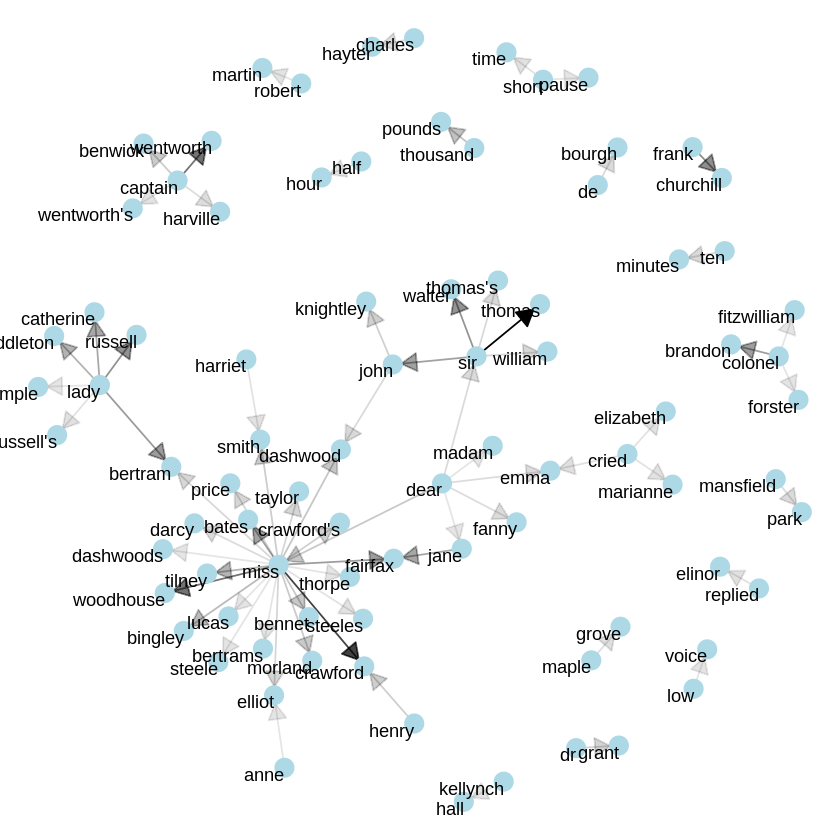

In [ ]:
# ============================================================
# Step 9: Customize Bigram Graph
# ============================================================

set.seed(2025)
a <- grid::arrow(type = "closed", length = unit(.15, "inches"))

ggraph(bigram_graph, layout = "fr") +
        geom_edge_link(aes(edge_alpha = n), show.legend = FALSE,
                        arrow = a, end_cap = circle(.07, 'inches')
                      ) +
        geom_node_point(color = "lightblue", size = 5) +
        geom_node_text(aes(label = name), vjust=1, hjust=1) +
        theme_void()

### 2.5 Co-occurrence and Correlation

In [ ]:
# ============================================================
# Step 10: Customize Bigram Graph
# ============================================================

install.packages('widyr')
library(widyr)

austen_section_words <- austen_books() %>%
                        filter(book == "Pride & Prejudice") %>%
                        mutate(section = row_number() %/% 10) %>%
                        filter(section > 0) %>%
                        unnest_tokens(word, text) %>%
                        filter(!word %in% stop_words$word)

word_pairs <- austen_section_words %>%
  pairwise_count(word, section, sort = TRUE)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘plyr’, ‘reshape2’




In [ ]:
# ============================================================
# Step 11: Phi Coefficient for Correlation
# ============================================================

word_cors <- austen_section_words %>%
              group_by(word) %>%
              filter(n() >= 20) %>%
              pairwise_cor(word, section, sort = TRUE)

Selecting by correlation


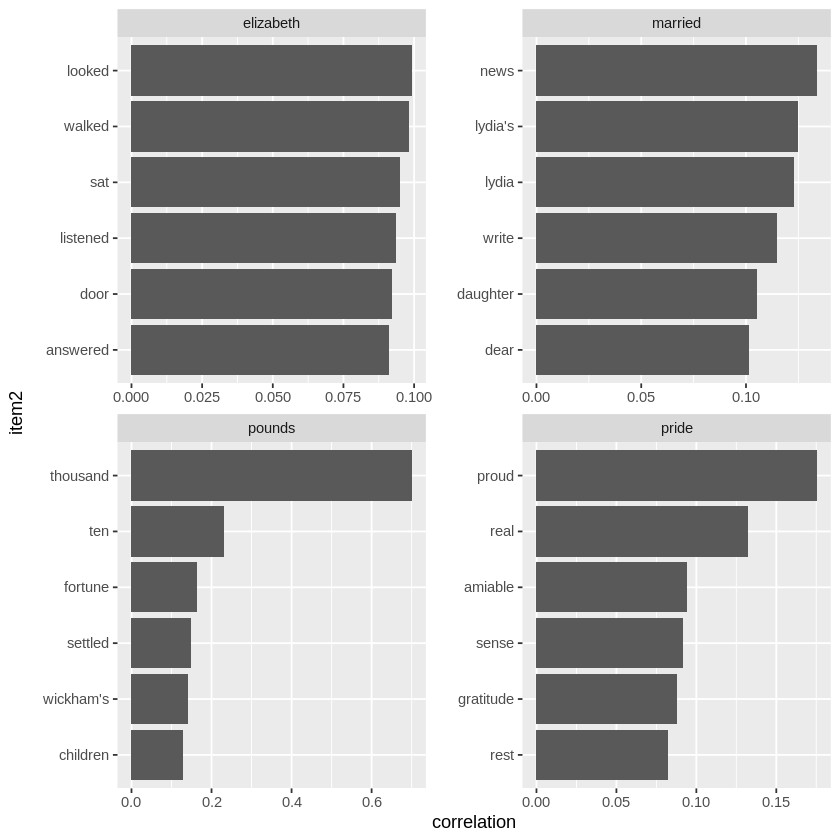

In [ ]:
# ============================================================
# Step 12: Exploring Correlations
# ============================================================

word_cors %>%
          filter(item1 %in% c("elizabeth","pounds","married","pride")) %>%
          group_by(item1) %>%
          top_n(6) %>%
          ungroup() %>%
          mutate(item2 = reorder(item2, correlation)) %>%
          ggplot(aes(item2, correlation)) +
          geom_bar(stat = "identity") +
          facet_wrap(~ item1, scales = "free") +
          coord_flip()

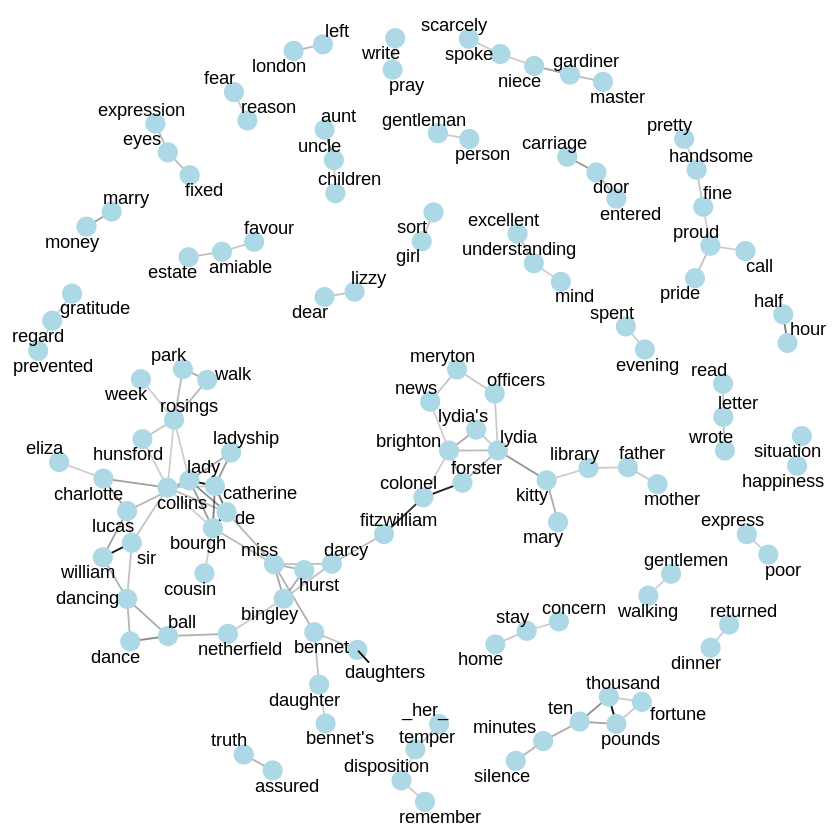

In [ ]:
# ============================================================
# Step 13: Visualize Correlations
# ============================================================

set.seed(2025)
word_cors %>%
    filter(correlation > .15) %>%
    graph_from_data_frame() %>%
    ggraph(layout = "fr") +
    geom_edge_link(aes(edge_alpha = correlation), show.legend = FALSE) +
    geom_node_point(color = "lightblue", size = 5) +
    geom_node_text(aes(label = name), repel = TRUE) +
    theme_void()